# Project Proposal - Duc Trinh

## Topic 

Study the percolation transition of the E-R graph numerically. How
does the size of the largest connected component scale with the system
size at the critical point? How does the size of the largest connected
component grow with $p$ at the critical point?
In the presentation show pictures of the generated graphs both below
and above the critical point, and also figures revealing the scaling of the largest connected component at $p_{c}$.

## Related notations and formulas:
- $<k>$ = average degree in network $ = (N-1)p$.
- $S$ = relative size of the largest component = $ \frac{s_{1}}{N} \approx 1 - e^{1-<k>S}$

## Outline
1. Background theory (lecture 7 for E-R model and lecture 9 for giant component and percolation)
  - E-R model
  - Giant component
  - Percolation transition for E-R model ($<k> = 1$ is the critical point) 
2. Scripts needed + explanation for each script:
  - A script to get the size of the largest connected component with varying system size and at a fixed $<k>$ value ($<k>$ = 1), this script should also output the $p$ that the network has
3. Plots needed for each script
  - A plot for largest component versus system size 
  - A plot for largest component versus $p$
  - Graphs below and above the critical point (without a connected component and with a connected component, should be graph with same N but different $p$)

## Code

In [0]:
import networkx as nx;
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
import math;

In [0]:
def Calc_chi_and_S(network):
    _network_N = network.number_of_nodes();
    _comps = nx.connected_components(network);
    _comp_sizes = [len(_comp) for _comp in _comps];
    _sort_c_sizes = sorted(_comp_sizes,reverse=True);
    _lcs = _sort_c_sizes[0]/_network_N;
    _chi = 0;
    if len(_sort_c_sizes) > 1:
        _chi = sum([_sort_c_sizes[i]*_sort_c_sizes[i] for i in range(1,len(_sort_c_sizes))]);
        return _chi/(len(_sort_c_sizes)),_lcs;
    else:
        return _chi,_lcs;

In [0]:
N, num_samp = 2000, 10;
delta = 0.01
p_list = np.linspace(1/(N-1)-delta, 1/(N-1)+delta, 400);
av_S,av_chi = [],[];
av_S.clear();
av_chi.clear();
for p in p_list:
    S_values, chi_values = [],[];
    S_values.clear();
    chi_values.clear();
    for i in range(0,num_samp):
        ER_graph = nx.generators.erdos_renyi_graph(N,p);
        chi,S = Calc_chi_and_S(ER_graph);
        S_values.append(S);
        chi_values.append(chi);
    av_S.append(np.mean(S_values));
    av_chi.append(np.mean(chi_values));

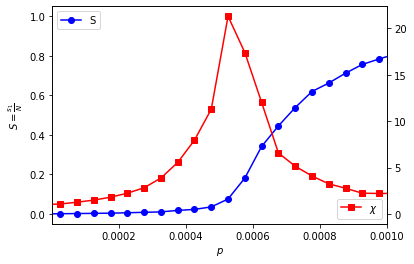

In [0]:
fig,ax = plt.subplots()
ax.plot(p_list,av_S,'o-',label = 'S', color = 'blue')
ax.set_ylabel(r'$S=\frac{s_1}{N}$')
ax2=ax.twinx()
ax2.plot(p_list,av_chi,'s-',label = r'$\chi$',color = 'red');
ax.set_xlabel(r'$p$')
plt.xlim((1/(N-1)-0.05*delta, 1/(N-1)+0.05*delta))
ax.legend(loc = 'upper left')
ax2.legend(loc = 'lower right')